#This is the script for task 7 and 8.

#First of all, I very much refered to the codes here for the all types of DQN for taks 7 and 8:https://github.com/Curt-Park/rainbow-is-all-you-need
#Above link is a github link and it includes the links from Vallira to Rainbow. Just in case, I put the links from Vallira to Rainbow.
#(Vanilla) DQN:https://colab.research.google.com/github/Curt-Park/rainbow-is-all-you-need/blob/master/01.dqn.ipynb
#Double DQN:https://colab.research.google.com/github/Curt-Park/rainbow-is-all-you-need/blob/master/02.double_q.ipynb
#Proritized Experence Replay DQN:https://colab.research.google.com/github/Curt-Park/rainbow-is-all-you-need/blob/master/03.per.ipynb
#Dueling DQN: https://colab.research.google.com/github/Curt-Park/rainbow-is-all-you-need/blob/master/04.dueling.ipynb
#Noisy DQN:https://colab.research.google.com/github/Curt-Park/rainbow-is-all-you-need/blob/master/05.noisy_net.ipynb
#n-step DQN:https://colab.research.google.com/github/Curt-Park/rainbow-is-all-you-need/blob/master/07.n_step_learning.ipynb
#Rainbow DQN:https://colab.research.google.com/github/Curt-Park/rainbow-is-all-you-need/blob/master/08.rainbow.ipynb

#For me, it is so difficult to make improved DQNs such as PER DQN which works in my environment. Therefore, I borrowed the extermal Rainbow DQN codes as I noticed above.

#The strategy to impliment DQN algorithms is that I borrow Rainbow DQN from the link above, and I simplify the borrowed Rainbow DQN as much as possible, because the borrwoed Rainbow DQN includes Categorical DQN part, but I do not need it. To simplify the Rainbow DQN, I refered to above links (Proritized Experence Replay DQN,Double DQN,Dueling DQN, Noisy DQN, n-step DQN ). Thus, my implimented algorithms are like a patch work from the external codes. In sum, my contribution is to simplify the Rainbow DQN algorithm and adapt it to my environment. I know my score will be reduced because I used external codes alot, but that is what I did to complete task 7 and 8.

#The original borrowed ranbow DQN does not work well, because the original one is implimented for Atari environment. For example, the original one does not read my environment step function. In addition, the original one does not have the episode loop in the function train(). Thus, I makes this loop to show my environment results in order to describe the performance of the my modified algorithms. This is another contrbution. In addition, the original one cannot store the result data, and so I implimented the codes to extract the data (results) to make the graphs. This is another contribution.

#For Vanilla and Dueling & Double DQN implimentations, I modified my arranged Rainbow DQNs (specifically, the un-nessesaly part such as PER part and n-step part are omitted) to make them. In addition, to simplify the modified Vanilla and Dueling & Double DQNs, I somewhat refered to Vanilla, Dueling and Double DQN implimentations from above likns.

#As for my environment, I also very referred to the codes here: https://github.com/notadamking/Stock-Trading-Environment
#However, I modifed the borrowed environment codes some what in order for my environment to work with my implimented DQNs.

#As for the data, I took it from the above link (https://github.com/notadamking/Stock-Trading-Environment)

#The explanation of the original environment codes are here:https://towardsdatascience.com/creating-a-custom-openai-gym-environment-for-stock-trading-be532be3910e

#Notice:I do not set up random seed, and so if you re-run my code, then you may get the different values of results.

#Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the lab materials
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Lab materials 01-20210104'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/DRL' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['AAPL.csv', 'dqn_taks78.ipynb', 'Copy of dqn_taks78.ipynb', 'experiment_new_baseline_good_task7,8_with_X_episodes_rainbow.ipynb', 'new_baseline_good_task7,8_with_X_episodes_rainbow.ipynb', 'Copy of baseline_good_task7,8_rainbow.ipynb', 'Copy of Copy of task7,8_rainbow.ipynb', 'Copy of latest_task7,8_rainbow.ipynb', 'Copy of Vallira_DQN.ipynb', 'Vallira_DQN.ipynb', 'Dueking_and_double.ipynb', 'latest_experiment_ new_baseline_good_task7,8_with_X_episodes_rainbow.ipynb', 'Copy of task7,8_rainbow.ipynb', 'latest_task7,8_rainbow.ipynb', 'Copy of new_baseline_good_task7,8_with_X_episodes_rainbow.ipynb', 'my_env5', 'my_env', 'my_env4', 'my_env2', 'Task7_and_8.ipynb']


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
CODE_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'my_env4')
sys.path.append(CODE_PATH)

In [ ]:
import sys
IN_COLAB = "google.colab" in sys.modules

#they are probably nessarily to run my code, but I reserve these codes to run my DQNs safely.
if IN_COLAB:
    !apt install python-opengl
    !apt install ffmpeg
    !apt install xvfb
    !pip install pyvirtualdisplay
    !pip install -U gym
    from pyvirtualdisplay import Display
    
    # Start virtual display
    dis = Display(visible=0, size=(400, 400))
    dis.start()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 0s (1,459 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 155501 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading packag

In [ ]:
import json
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

#https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/
#Here and the below codes to import data from what I have in local pc, I followed the way to import the csv.file from above link!!

In [ ]:
#https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/
#Here and the below codes to import data from what I have in local pc, I followed the way to import the csv.file from above link!!

#Notice: I uploaded my data from my local laptop to google colab to use my data.
#Thus, to execute this part of codes, you need to have the data in your local PC and then select the data from your local PC.
#Therefore, I will upload the data file with the codes (probably...)
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['AAPL.csv']))
df = df.sort_values('Date')

#If you run the code in jupyter notebook, then you use
# df = pd.read=csv("AAPL.csv") with locating AAPL.csv file in the the same directly of this script

In [ ]:
import math
import os
import random
from collections import deque
from typing import Deque, Dict, List, Tuple

import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from IPython.display import clear_output
from torch.nn.utils import clip_grad_norm_

# download segment tree module : this probably nesseralily, but to run my code safly, I leave the code here.
if IN_COLAB:
    !wget https://raw.githubusercontent.com/curt-park/rainbow-is-all-you-need/master/segment_tree.py

from segment_tree import MinSegmentTree, SumSegmentTree

--2022-04-23 13:58:21--  https://raw.githubusercontent.com/curt-park/rainbow-is-all-you-need/master/segment_tree.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4283 (4.2K) [text/plain]
Saving to: ‘segment_tree.py’

segment_tree.py     100%[===================>]   4.18K  --.-KB/s    in 0s      

2022-04-23 13:58:21 (26.3 MB/s) - ‘segment_tree.py’ saved [4283/4283]



# Import Environment

In [ ]:
from Custom_env_4 import StockTradingEnv
env = StockTradingEnv(df)

# Vanillira DQN

In [ ]:
# Replya Buffer

In [ ]:
class ReplayBuffer:

    def __init__(self, obs_dim: int, size: int, batch_size: int = 32):
        self.obs_buf = np.zeros([size, obs_dim], dtype=np.float32)
        self.next_obs_buf = np.zeros([size, obs_dim], dtype=np.float32)
        self.acts_buf = np.zeros([size], dtype=np.float32)
        self.rews_buf = np.zeros([size], dtype=np.float32)
        self.done_buf = np.zeros(size, dtype=np.float32)
        self.max_size, self.batch_size = size, batch_size
        self.ptr, self.size, = 0, 0

    def store(
        self,
        obs: np.ndarray,
        act: np.ndarray, 
        rew: float, 
        next_obs: np.ndarray, 
        done: bool,
    ):
        self.obs_buf[self.ptr] = obs
        self.next_obs_buf[self.ptr] = next_obs
        self.acts_buf[self.ptr] = act
        self.rews_buf[self.ptr] = rew
        self.done_buf[self.ptr] = done
        self.ptr = (self.ptr + 1) % self.max_size
        self.size = min(self.size + 1, self.max_size)

    def sample_batch(self) -> Dict[str, np.ndarray]:
        idxs = np.random.choice(self.size, size=self.batch_size, replace=False)
        return dict(obs=self.obs_buf[idxs],
                    next_obs=self.next_obs_buf[idxs],
                    acts=self.acts_buf[idxs],
                    rews=self.rews_buf[idxs],
                    done=self.done_buf[idxs])

    def __len__(self) -> int:
        return self.size

In [ ]:
#Network

In [ ]:
class Network_Vanillira(nn.Module):
    def __init__(self, in_dim: int, out_dim: int):
        
        super(Network_Vanillira, self).__init__()

        self.layers = nn.Sequential(
            nn.Linear(in_dim, 128), 
            nn.ReLU(),
            nn.Linear(128, 128), 
            nn.ReLU(), 
            nn.Linear(128, out_dim)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Forward method implementation."""
        return self.layers(x)

In [ ]:
# Agent

In [ ]:
class DQNAgent:
    """Vanilla DQN
    

        env (gym.Env): To read my stock environment
        memory: replay memory to store transitions
        batch_size (int): batch size for sampling
        target_update (int): the update frequency of target q
        gamma: discount rate
        dqn (Network): model to train and select actions
        dqn_target (Network): target model to update
        optimizer (torch.optim): optimizer for training dqn
        transition (list): transition information including state, action, reward, next_state, done
        support (torch.Tensor): support for categorical dqn
    """

    def __init__(
        self, 
        env: gym.Env,
        memory_size: int,
        batch_size: int,
        target_update: int,
        epsilon_decay: float = 1.0,
        max_epsilon: float = 1.0,
        min_epsilon: float = 0.1,
        gamma: float = 0.99,
    ):
        """ intialization
            env (gym.Env): To read my stock environment
            memory: replay memory to store transitions
            batch_size (int): batch size for sampling
            target_update (int): the update frequency of target q
            epsilon_decay (float): step size to decrease epsilon
            lr (float): learning rate
            max_epsilon (float): max value of epsilon
            min_epsilon (float): min value of epsilon
            gamma (float): discount factor
        """
        obs_dim = env.observation_space.shape[0]
        action_dim = env.action_space.n
        
        self.env = env
        self.memory = ReplayBuffer(obs_dim, memory_size, batch_size)
        self.batch_size = batch_size
        self.epsilon = max_epsilon
        self.epsilon_decay = epsilon_decay
        self.max_epsilon = max_epsilon
        self.min_epsilon = min_epsilon
        self.target_update = target_update
        self.gamma = gamma
        
        # device specification
        self.device = torch.device(
            "cuda" if torch.cuda.is_available() else "cpu"
        )
        print(self.device)

        # networks: dqn and dqn_target
        self.dqn = Network_Vanillira(obs_dim, action_dim).to(self.device)
        self.dqn_target = Network_Vanillira(obs_dim, action_dim).to(self.device)
        self.dqn_target.load_state_dict(self.dqn.state_dict())
        self.dqn_target.eval()
        
        # optimizer
        self.optimizer = optim.Adam(self.dqn.parameters())

        # transition to store in memory
        self.transition = list()

# epsilon greedy policy!!
    def policy(self, state: np.ndarray) -> np.ndarray:
        """Select an action from the input state."""

        
        if self.epsilon > np.random.random():
            selected_action = self.env.action_space.sample()
        else:
            selected_action = self.dqn(
                torch.FloatTensor(state).to(self.device)
            ).argmax()
            selected_action = selected_action.detach().cpu().numpy()
        
        if not self.is_test:
            self.transition = [state, selected_action]

        self.epsilon = self.epsilon*self.epsilon_decay#0.9999 is the constant decay parameter

        if self.epsilon < 0.02:#this is the minimum threshold of epsilon value
            self.epsilon = self.epsilon

        
        return selected_action
        
    

    def update_model(self) -> torch.Tensor:
        
        # PER needs beta to calculate weights (this will be used for Rainbow)
        samples = self.memory.sample_batch(self.beta)
        weights = torch.FloatTensor(
            samples["weights"].reshape(-1, 1)
        ).to(self.device)
        indices = samples["indices"]
        
        # 1-step Learning loss (because normal DQN)
        elementwise_loss = self._compute_dqn_loss(samples, self.gamma)
        


        self.optimizer.zero_grad()
        loss.backward()
        clip_grad_norm_(self.dqn.parameters(), 10.0)
        self.optimizer.step()
        

        return loss.item()

#num_frames = # of episode, at this moment, I set 100 episode
#Here, I train the agent
    def train(self, num_frames: int, num_episode: int = int):

        self.is_test = False
        memory_episode=[]
        losses = []
        loss = np.nan


        
        state = self.env.reset()
        for i in range(num_episode):
           #this is added by myself
            #here, this is the same as obs = env.reser()!!
            update_cnt = 0
            #this is collected to show the graph!!
            scores = []#this is collected to show the graph
            score = 0#Initial reward



        
        

        #this is for loop = # of steps in each episode
        #this should be length of the data!!
            for frame_idx in range(1, num_frames + 1):
                action = self.policy(state)
                next_state, reward, done, _ = self.env.step(action)


            

                state = next_state

            # if episode ends
                if done:
                    state = self.env.reset()
                    scores.append(score)
                    score = 0
                    #added
                    #profit = 0

            # if training is ready
                if len(self.memory) >= self.batch_size:
                    loss = self.update_model()
                    update_cnt += 1
                
                # if the target q update is needed
                    if update_cnt % self.target_update == 0:
                        self._target_hard_update()

        
        #this makes the average_values in each episode. A
            episode_output = self.env.render()
            memory_episode.append(episode_output)
            losses.append(loss)
            profit, max_net_worth,current_step,current_balance,shares_held,total_shares_sold,cost_basis,total_sales_value,net_worth=self.env.render()
            
            df_episode_output=pd.DataFrame(memory_episode)#
        df_episode_output.to_pickle("./dummy.pkl")
        df_episode_loss=pd.DataFrame(losses)
        df_episode_loss.to_pickle("./dummy2.pkl")
        
        

        
        self.env.close()
        

        return df_episode_output 
                


    def _compute_dqn_loss(self, samples: Dict[str, np.ndarray], gamma: float) -> torch.Tensor:
        """Return the loss values"""
        device = self.device  # device specification
        state = torch.FloatTensor(samples["obs"]).to(device)
        next_state = torch.FloatTensor(samples["next_obs"]).to(device)
        action = torch.LongTensor(samples["acts"]).to(device)
        reward = torch.FloatTensor(samples["rews"].reshape(-1, 1)).to(device)
        done = torch.FloatTensor(samples["done"].reshape(-1, 1)).to(device)
        
 
        curr_q_value = self.dqn(state).gather(1, action)
        next_q_value = self.dqn_target(next_state).gather(  # Double DQN
            1, self.dqn(next_state).argmax(dim=1, keepdim=True)
        ).detach()
        mask = 1 - done
        target = (reward + self.gamma * next_q_value * mask).to(self.device)

        # calculate dqn loss here
        loss = F.smooth_l1_loss(curr_q_value, target)

        return loss
    # Target update 
    def _target_hard_update(self):
        self.dqn_target.load_state_dict(self.dqn.state_dict())
    

## Experiment 1 of Vanillra

In [ ]:
# parameters
num_frames = 1000
num_episode= 100
memory_size = 500
batch_size = 64
target_update = 200


# train
agent = DQNAgent(env, memory_size, batch_size, target_update)

cpu


In [ ]:
agent.train(num_frames,num_episode)

drive/My Drive/Colab Notebooks/DRL/my_env4/Custom_env_4.py:88: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  ],dtype=np.float16)


Step: 1872
Balance: 31.629166597820586
Shares held: 573 (Total sold: 70493)
Avg cost for held shares: 36.9674947204942 (Total sales value: 1822526.5756051363)
Net worth: 20597.096867828415 (Max net worth: 21660.181879529373)
Profit: 10597.096867828415
Step: 1872
Balance: 31.629166597820586
Shares held: 573 (Total sold: 70493)
Avg cost for held shares: 36.9674947204942 (Total sales value: 1822526.5756051363)
Net worth: 20597.096867828415 (Max net worth: 21660.181879529373)
Profit: 10597.096867828415
Step: 2872
Balance: 23.836132913726033
Shares held: 207 (Total sold: 138339)
Avg cost for held shares: 140.48945272551293 (Total sales value: 8574646.666726097)
Net worth: 29105.1528470949 (Max net worth: 85938.84073740742)
Profit: 19105.1528470949
Step: 2872
Balance: 23.836132913726033
Shares held: 207 (Total sold: 138339)
Avg cost for held shares: 140.48945272551293 (Total sales value: 8574646.666726097)
Net worth: 29105.1528470949 (Max net worth: 85938.84073740742)
Profit: 19105.152847094

,0,1,2,3,4,5,6,7,8
0,1.059710e+04,2.166018e+04,1872,3.162917e+01,573,70493,36.967495,1.822527e+06,2.059710e+04
1,1.910515e+04,8.593884e+04,2872,2.383613e+01,207,138339,140.489453,8.574647e+06,2.910515e+04
2,6.368034e+04,8.593884e+04,3872,7.368034e+04,0,163876,0.000000,1.712942e+07,7.368034e+04
3,1.282344e+04,9.263714e+04,4872,3.333714e+01,146,188653,153.914261,2.271227e+07,2.282344e+04
4,2.411569e+04,9.263714e+04,622,8.333297e+01,339,300295,100.390433,2.881257e+07,3.411569e+04
...,...,...,...,...,...,...,...,...,...
95,5.352245e+06,5.578144e+06,2168,5.362245e+06,0,41337592,0.000000,2.016348e+09,5.362245e+06
96,7.367896e+06,1.030494e+07,3168,2.297308e+02,28190,49949018,261.722642,3.174086e+09,7.377896e+06
97,2.030260e+06,1.387176e+07,4168,2.016899e+01,20607,53883453,96.474032,4.901290e+09,2.040260e+06
98,2.281896e+06,1.387176e+07,5168,2.291896e+06,0,56548636,0.000000,5.242488e+09,2.291896e+06


In [ ]:
result1 = pd.read_pickle("./dummy.pkl") 
print(result1)

#I could not put the column names for result1 in google colab. thus, I explain them below.
#[profit, max_net_worth,current_step,current_balance,shares_held,total_shares_sold,cost_basis,total_sales_value,net_worth]
#profit = column 0 and the order above is correspond to the column names from 0 to 8.
#Thus, new_worth = column 8

#Anyway, I only use column 0 information (profit informatioin), and so this is enough explanation.

               0             1     2             3      4         5  \
0   1.059710e+04  2.166018e+04  1872  3.162917e+01    573     70493   
1   1.910515e+04  8.593884e+04  2872  2.383613e+01    207    138339   
2   6.368034e+04  8.593884e+04  3872  7.368034e+04      0    163876   
3   1.282344e+04  9.263714e+04  4872  3.333714e+01    146    188653   
4   2.411569e+04  9.263714e+04   622  8.333297e+01    339    300295   
..           ...           ...   ...           ...    ...       ...   
95  5.352245e+06  5.578144e+06  2168  5.362245e+06      0  41337592   
96  7.367896e+06  1.030494e+07  3168  2.297308e+02  28190  49949018   
97  2.030260e+06  1.387176e+07  4168  2.016899e+01  20607  53883453   
98  2.281896e+06  1.387176e+07  5168  2.291896e+06      0  56548636   
99  1.492059e+06  1.387176e+07   918  1.502059e+06      0  71713369   

             6             7             8  
0    36.967495  1.822527e+06  2.059710e+04  
1   140.489453  8.574647e+06  2.910515e+04  
2     0.0000

##experiment 2

In [ ]:
# parameters
num_frames = 1000
num_episode= 100
memory_size = 500
batch_size = 64
target_update = 200


# train
agent = DQNAgent(env, memory_size, batch_size, target_update)

cpu


In [ ]:
agent.train(num_frames,num_episode)

drive/My Drive/Colab Notebooks/DRL/my_env4/Custom_env_4.py:88: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  ],dtype=np.float16)


Step: 3045
Balance: 15996.711198923516
Shares held: 0 (Total sold: 18547)
Avg cost for held shares: 0 (Total sales value: 2127265.058377435)
Net worth: 15996.711198923516 (Max net worth: 18223.207596130622)
Profit: 5996.711198923516
Step: 3045
Balance: 15996.711198923516
Shares held: 0 (Total sold: 18547)
Avg cost for held shares: 0 (Total sales value: 2127265.058377435)
Net worth: 15996.711198923516 (Max net worth: 18223.207596130622)
Profit: 5996.711198923516
Step: 4045
Balance: 28889.519379838755
Shares held: 0 (Total sold: 28186)
Avg cost for held shares: 0 (Total sales value: 6084665.952622205)
Net worth: 28889.519379838755 (Max net worth: 31742.367681894764)
Profit: 18889.519379838755
Step: 4045
Balance: 28889.519379838755
Shares held: 0 (Total sold: 28186)
Avg cost for held shares: 0 (Total sales value: 6084665.952622205)
Net worth: 28889.519379838755 (Max net worth: 31742.367681894764)
Profit: 18889.519379838755
Step: 5045
Balance: 40.47235722916594
Shares held: 180 (Total sold

,0,1,2,3,4,5,6,7,8
0,5996.711199,18223.207596,3045,15996.711199,0,18547,0.000000,2.127265e+06,15996.711199
1,18889.519380,31742.367682,4045,28889.519380,0,28186,0.000000,6.084666e+06,28889.519380
2,22167.724094,39199.264566,5045,40.472357,180,65992,177.562933,1.086995e+07,32167.724094
3,-1646.649058,14715.877246,1949,8353.350942,0,52327,0.000000,1.308918e+06,8353.350942
4,20347.176741,30770.364119,2949,74.956018,164,83111,184.586712,4.748291e+06,30347.176741
...,...,...,...,...,...,...,...,...,...
95,218503.635248,562279.219188,3214,6.701096,775,3523236,294.834754,2.487868e+08,228503.635248
96,46817.790589,562279.219188,4214,56817.790589,0,3647815,0.000000,3.035531e+08,56817.790589
97,67401.851656,562279.219188,5214,77401.851656,0,3726097,0.000000,3.139339e+08,77401.851656
98,-4559.814028,562279.219188,964,5440.185972,0,3769976,0.000000,3.158129e+08,5440.185972


In [ ]:
result2 = pd.read_pickle("./dummy.pkl") 
print(result2)

#I could not put the column names for result in google colab. thus, I explain them below.
#[profit, max_net_worth,current_step,current_balance,shares_held,total_shares_sold,cost_basis,total_sales_value,net_worth]
#profit = column 0 and the order above is correspond to the column names from 0 to 8.
#Thus, new_worth = column 8

#Anyway, I only use column 0 information (profit informatioin), and so this is enough explanation.

                0              1     2             3    4        5  \
0     5996.711199   18223.207596  3045  15996.711199    0    18547   
1    18889.519380   31742.367682  4045  28889.519380    0    28186   
2    22167.724094   39199.264566  5045     40.472357  180    65992   
3    -1646.649058   14715.877246  1949   8353.350942    0    52327   
4    20347.176741   30770.364119  2949     74.956018  164    83111   
..            ...            ...   ...           ...  ...      ...   
95  218503.635248  562279.219188  3214      6.701096  775  3523236   
96   46817.790589  562279.219188  4214  56817.790589    0  3647815   
97   67401.851656  562279.219188  5214  77401.851656    0  3726097   
98   -4559.814028  562279.219188   964   5440.185972    0  3769976   
99   15897.814521   27396.152790   628     23.160685  477    43422   

             6             7              8  
0     0.000000  2.127265e+06   15996.711199  
1     0.000000  6.084666e+06   28889.519380  
2   177.562933  1.086

##experiment 3

In [ ]:
# parameters
num_frames = 1000
num_episode= 100
memory_size = 500
batch_size = 64
target_update = 200


# train
agent = DQNAgent(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)

cpu


drive/My Drive/Colab Notebooks/DRL/my_env4/Custom_env_4.py:88: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  ],dtype=np.float16)


Step: 4666
Balance: 11843.81436915693
Shares held: 0 (Total sold: 11354)
Avg cost for held shares: 0 (Total sales value: 1755238.3717705796)
Net worth: 11843.81436915693 (Max net worth: 13105.155820409425)
Profit: 1843.8143691569294
Step: 4666
Balance: 11843.81436915693
Shares held: 0 (Total sold: 11354)
Avg cost for held shares: 0 (Total sales value: 1755238.3717705796)
Net worth: 11843.81436915693 (Max net worth: 13105.155820409425)
Profit: 1843.8143691569294
Step: 2176
Balance: 26.672824233010033
Shares held: 151 (Total sold: 11300)
Avg cost for held shares: 67.63253519842796 (Total sales value: 628215.1974269289)
Net worth: 10291.664392278588 (Max net worth: 13359.845970986848)
Profit: 291.6643922785879
Step: 2176
Balance: 26.672824233010033
Shares held: 151 (Total sold: 11300)
Avg cost for held shares: 67.63253519842796 (Total sales value: 628215.1974269289)
Net worth: 10291.664392278588 (Max net worth: 13359.845970986848)
Profit: 291.6643922785879
Step: 3176
Balance: 234.64410539

,0,1,2,3,4,5,6,7,8
0,1.843814e+03,1.310516e+04,4666,1.184381e+04,0,11354,0.000000,1.755238e+06,1.184381e+04
1,2.916644e+02,1.335985e+04,2176,2.667282e+01,151,11300,67.632535,6.282152e+05,1.029166e+04
2,8.023047e+03,1.822187e+04,3176,2.346441e+02,71,28216,247.620475,2.895024e+06,1.802305e+04
3,2.931628e+04,4.080820e+04,4176,3.931628e+04,0,41450,0.000000,7.651703e+06,3.931628e+04
4,4.517211e+04,6.327773e+04,5176,5.517211e+04,0,102698,0.000000,1.553893e+07,5.517211e+04
...,...,...,...,...,...,...,...,...,...
95,2.617433e+06,3.344326e+08,1505,1.763523e+01,128962,3654902393,20.373566,2.559411e+11,2.627433e+06
96,4.052751e+06,3.344326e+08,2505,4.062751e+06,0,3666096928,0.000000,2.565936e+11,4.062751e+06
97,4.877474e+06,3.344326e+08,3505,2.564216e+02,12434,3669546613,393.052692,2.572667e+11,4.887474e+06
98,5.193282e+06,3.344326e+08,4505,5.203282e+06,0,3673592148,0.000000,2.581441e+11,5.203282e+06


In [ ]:
result3 = pd.read_pickle("./dummy.pkl") 
print(result3)

#I could not put the column names for result in google colab. thus, I explain them below.
#[profit, max_net_worth,current_step,current_balance,shares_held,total_shares_sold,cost_basis,total_sales_value,net_worth]
#profit = column 0 and the order above is correspond to the column names from 0 to 8.
#Thus, new_worth = column 8

#Anyway, I only use column 0 information (profit informatioin), and so this is enough explanation.

               0             1     2             3       4           5  \
0   1.843814e+03  1.310516e+04  4666  1.184381e+04       0       11354   
1   2.916644e+02  1.335985e+04  2176  2.667282e+01     151       11300   
2   8.023047e+03  1.822187e+04  3176  2.346441e+02      71       28216   
3   2.931628e+04  4.080820e+04  4176  3.931628e+04       0       41450   
4   4.517211e+04  6.327773e+04  5176  5.517211e+04       0      102698   
..           ...           ...   ...           ...     ...         ...   
95  2.617433e+06  3.344326e+08  1505  1.763523e+01  128962  3654902393   
96  4.052751e+06  3.344326e+08  2505  4.062751e+06       0  3666096928   
97  4.877474e+06  3.344326e+08  3505  2.564216e+02   12434  3669546613   
98  5.193282e+06  3.344326e+08  4505  5.203282e+06       0  3673592148   
99  9.554091e+06  3.344326e+08   255  3.305111e+01  218055  3694334969   

             6             7             8  
0     0.000000  1.755238e+06  1.184381e+04  
1    67.632535  6.282

##experiment 4

In [ ]:
# parameters
num_frames = 1000
num_episode= 100
memory_size = 500
batch_size = 64
target_update = 200


# train
agent = DQNAgent(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)

cpu


drive/My Drive/Colab Notebooks/DRL/my_env4/Custom_env_4.py:88: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  ],dtype=np.float16)


Step: 2567
Balance: 26398.365056102153
Shares held: 0 (Total sold: 19761)
Avg cost for held shares: 0 (Total sales value: 1904210.905360816)
Net worth: 26398.365056102153 (Max net worth: 27353.895560874415)
Profit: 16398.365056102153
Step: 2567
Balance: 26398.365056102153
Shares held: 0 (Total sold: 19761)
Avg cost for held shares: 0 (Total sales value: 1904210.905360816)
Net worth: 26398.365056102153 (Max net worth: 27353.895560874415)
Profit: 16398.365056102153
Step: 3567
Balance: 38765.93885374616
Shares held: 0 (Total sold: 46699)
Avg cost for held shares: 0 (Total sales value: 7439418.0707777655)
Net worth: 38765.93885374616 (Max net worth: 41261.049432546104)
Profit: 28765.938853746156
Step: 3567
Balance: 38765.93885374616
Shares held: 0 (Total sold: 46699)
Avg cost for held shares: 0 (Total sales value: 7439418.0707777655)
Net worth: 38765.93885374616 (Max net worth: 41261.049432546104)
Profit: 28765.938853746156
Step: 4567
Balance: 81.51086478328216
Shares held: 630 (Total sold

,0,1,2,3,4,5,6,7,8
0,1.639837e+04,2.735390e+04,2567,26398.365056,0,19761,0.000000,1.904211e+06,2.639837e+04
1,2.876594e+04,4.126105e+04,3567,38765.938854,0,46699,0.000000,7.439418e+06,3.876594e+04
2,5.124533e+04,7.507187e+04,4567,81.510865,630,102342,96.278431,1.741184e+07,6.124533e+04
3,2.229546e+02,9.506395e+04,317,9.634933,270,177679,33.488313,2.609379e+07,1.022295e+04
4,3.833937e+03,9.506395e+04,1317,13833.936835,0,291141,0.000000,2.937520e+07,1.383394e+04
...,...,...,...,...,...,...,...,...,...
95,2.759035e+05,2.961313e+05,406,285903.549174,0,597233,0.000000,3.586332e+07,2.859035e+05
96,4.709525e+05,6.087185e+05,1406,480952.501961,0,4248518,0.000000,1.183857e+08,4.809525e+05
97,1.495685e+06,1.572537e+06,2406,139.550692,10306,7054130,145.880925,2.608105e+08,1.505685e+06
98,2.365810e+06,2.375810e+06,3406,130.501946,6556,8507839,354.354147,5.316381e+08,2.375810e+06


In [ ]:
result4 = pd.read_pickle("./dummy.pkl") 
print(result4)



               0             1     2              3      4        5  \
0   1.639837e+04  2.735390e+04  2567   26398.365056      0    19761   
1   2.876594e+04  4.126105e+04  3567   38765.938854      0    46699   
2   5.124533e+04  7.507187e+04  4567      81.510865    630   102342   
3   2.229546e+02  9.506395e+04   317       9.634933    270   177679   
4   3.833937e+03  9.506395e+04  1317   13833.936835      0   291141   
..           ...           ...   ...            ...    ...      ...   
95  2.759035e+05  2.961313e+05   406  285903.549174      0   597233   
96  4.709525e+05  6.087185e+05  1406  480952.501961      0  4248518   
97  1.495685e+06  1.572537e+06  2406     139.550692  10306  7054130   
98  2.365810e+06  2.375810e+06  3406     130.501946   6556  8507839   
99  2.466381e+06  2.823445e+06  4406      46.737299  20157  9972288   

             6             7             8  
0     0.000000  1.904211e+06  2.639837e+04  
1     0.000000  7.439418e+06  3.876594e+04  
2    96.2784

##experiment 5

In [ ]:
# parameters
num_frames = 1000
num_episode= 100
memory_size = 500
batch_size = 64
target_update = 200


# train
agent = DQNAgent(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
result5 = pd.read_pickle("./dummy.pkl") 
print(result5)

cpu


drive/My Drive/Colab Notebooks/DRL/my_env4/Custom_env_4.py:88: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  ],dtype=np.float16)


Step: 2984
Balance: 27368.59638518254
Shares held: 0 (Total sold: 18854)
Avg cost for held shares: 0 (Total sales value: 2260240.9877243363)
Net worth: 27368.59638518254 (Max net worth: 27812.369061148027)
Profit: 17368.59638518254
Step: 2984
Balance: 27368.59638518254
Shares held: 0 (Total sold: 18854)
Avg cost for held shares: 0 (Total sales value: 2260240.9877243363)
Net worth: 27368.59638518254 (Max net worth: 27812.369061148027)
Profit: 17368.59638518254
Step: 3984
Balance: 28235.104463346674
Shares held: 0 (Total sold: 34670)
Avg cost for held shares: 0 (Total sales value: 8254258.70789876)
Net worth: 28235.104463346674 (Max net worth: 53136.540350413365)
Profit: 18235.104463346674
Step: 3984
Balance: 28235.104463346674
Shares held: 0 (Total sold: 34670)
Avg cost for held shares: 0 (Total sales value: 8254258.70789876)
Net worth: 28235.104463346674 (Max net worth: 53136.540350413365)
Profit: 18235.104463346674
Step: 4984
Balance: 148.7516586908896
Shares held: 210 (Total sold: 72

# Dueling and Double DQN

In [ ]:
# For replay memory, I use the same code of Vanillira

In [ ]:
class Network_Dueling(nn.Module):
    def __init__(
        self, 
        in_dim: int, 
        out_dim: int, 
    ):
        """Initialization."""
        super(Network_Dueling, self).__init__()
        self.feature_layer = nn.Sequential(
            nn.Linear(in_dim, 128), 
            nn.ReLU(),
        )
        
        # set advantage layer for dueling
        self.advantage_layer = nn.Sequential(
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, out_dim),
        )

        # set value layer for dueling
        self.value_layer = nn.Sequential(
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
        )
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Do forward for q"""
        feature = self.feature_layer(x)
        
        value = self.value_layer(feature)
        advantage = self.advantage_layer(feature)

        q = value + advantage - advantage.mean(dim=-1, keepdim=True)
        
        return q
    
    


In [ ]:
# agent

In [ ]:
class DQNAgent2:
    """DQN Agent interacting with environment.
    

    Attribute:
        env (gym.Env): To read my stock environment
        memory: replay memory to store transitions
        batch_size (int): batch size for sampling
        target_update (int): the update frequency of target q
        gamma: discount rate
        dqn (Network): model to train and select actions
        dqn_target (Network): target model to update
        optimizer (torch.optim): optimizer for training dqn
        transition (list): transition information including state, action, reward, next_state, done
        memory_n (ReplayBuffer): n-step replay buffer
    """

    def __init__(
        self, 
        env: gym.Env,
        memory_size: int,
        batch_size: int,
        target_update: int,
        epsilon_decay: float = 1.0,
        max_epsilon: float = 1.0,
        min_epsilon: float = 0.1,
        gamma: float = 0.99

    ):
        """Initialization.
        
        Args:
            env (gym.Env): To read my stock environment
            memory: replay memory to store transitions
            batch_size (int): batch size for sampling
            target_update (int): the update frequency of target q
            gamma: discount rate
            prior_eps (float): guarantees every transition can be sampled
        """
        obs_dim = env.observation_space.shape[0]
        action_dim = env.action_space.n
        
        self.env = env
        self.memory = ReplayBuffer(obs_dim, memory_size, batch_size)
        self.batch_size = batch_size
        self.epsilon = max_epsilon
        self.epsilon_decay = epsilon_decay
        self.max_epsilon = max_epsilon
        self.min_epsilon = min_epsilon
        self.target_update = target_update
        self.gamma = gamma
        
        # device: device specification
        self.device = torch.device(
            "cuda" if torch.cuda.is_available() else "cpu"
        )
        print(self.device)

# epsilon greedy policy!!
    def policy(self, state: np.ndarray) -> np.ndarray:
        """Select an action from the input state."""
        
        
        if self.epsilon > np.random.random():
            selected_action = self.env.action_space.sample()
        else:
            selected_action = self.dqn(
                torch.FloatTensor(state).to(self.device)
            ).argmax()
            selected_action = selected_action.detach().cpu().numpy()
        
        if not self.is_test:
            self.transition = [state, selected_action]

        self.epsilon = self.epsilon*self.epsilon_decay#0.9999 is the constant decay parameter

        if self.epsilon < 0.02:#this is the minimum threshold of epsilon value
            self.epsilon = self.epsilon

        
        return selected_action

        # networks: dqn, dqn_target from network
        self.dqn = Network_Dueling(obs_dim, action_dim).to(self.device)
        self.dqn_target = Network_Dueling(obs_dim, action_dim).to(self.device)
        self.dqn_target.load_state_dict(self.dqn.state_dict())
        self.dqn_target.eval()
        
        # optimizer for nural network
        self.optimizer = optim.Adam(self.dqn.parameters())

        # transition to store in memory
        self.transition = list()





    

    def update_model(self) -> torch.Tensor:
        """Loss calculation by using gradient descent."""
        # PER needs beta to calculate weights
        samples = self.memory.sample_batch(self.beta)
        weights = torch.FloatTensor(
            samples["weights"].reshape(-1, 1)
        ).to(self.device)
        indices = samples["indices"]
        
        # 1-step Learning loss
        elementwise_loss = self._compute_dqn_loss(samples, self.gamma)
        


        self.optimizer.zero_grad()
        loss.backward()
        clip_grad_norm_(self.dqn.parameters(), 10.0)
        self.optimizer.step()
        

        return loss.item()



#num_frames = # of episode, at this moment, I set 200 episode
    def train(self, num_frames: int, num_episode: int ):#plotting_interval: int = 1 shoulde be changed the value what I want to have. Originally, int = 200
        """Train the agent."""
        self.is_test = False
        memory_episode=[]
        losses = []
        loss = np.nan


        
        state = self.env.reset()
        for i in range(num_episode):

            update_cnt = 0
            #this is collected to show the graph!!
            scores = []#this is collected to show the graph
            score = 0#Initial reward



        
        

        #this is for loop = # of steps in each episode
        #this should be length of the data!!
            for frame_idx in range(1, num_frames + 1):
                action = self.policy(state)
                next_state, reward, done, _ = self.env.step(action)


            

                state = next_state

            

            # if episode ends (my environment is rare)
                if done:
                    state = self.env.reset()
                    scores.append(score)
                    score = 0


            # if training is ready
                if len(self.memory) >= self.batch_size:
                    loss = self.update_model()
                    update_cnt += 1
                
                # if the target Q is needed
                    if update_cnt % self.target_update == 0:
                        self._target_hard_update()

        
        #this makes the average_values in each episode. 
            episode_output = self.env.render()
            memory_episode.append(episode_output)#added
            losses.append(loss)
            profit, max_net_worth,current_step,current_balance,shares_held,total_shares_sold,cost_basis,total_sales_value,net_worth=self.env.render()
            
            df_episode_output=pd.DataFrame(memory_episode)#
        df_episode_output.to_pickle("./dummy.pkl")
        df_episode_loss=pd.DataFrame(losses)
        df_episode_loss.to_pickle("./dummy2.pkl")
        
        

        #df_episode_output.to_csv()
        
        self.env.close()
        
        #profit= memory_episode[0]
        return df_episode_output # added
                


    def _compute_dqn_loss(self, samples: Dict[str, np.ndarray], gamma: float) -> torch.Tensor:
        """Return DQN loss values"""
        device = self.device  # for shortening the following lines
        state = torch.FloatTensor(samples["obs"]).to(device)
        next_state = torch.FloatTensor(samples["next_obs"]).to(device)
        action = torch.LongTensor(samples["acts"]).to(device)
        reward = torch.FloatTensor(samples["rews"].reshape(-1, 1)).to(device)
        done = torch.FloatTensor(samples["done"].reshape(-1, 1)).to(device)
        
 
        curr_q_value = self.dqn(state).gather(1, action)
        next_q_value = self.dqn_target(next_state).gather(  # Double DQN
            1, self.dqn(next_state).argmax(dim=1, keepdim=True)
        ).detach()
        mask = 1 - done
        target = (reward + self.gamma * next_q_value * mask).to(self.device)

        # calculate dqn loss
        loss = F.smooth_l1_loss(curr_q_value, target)

        return loss




    
    #Q target update is separatelly executed from q value (estimated value) update.
    #Here, this is dueling and  DQN
    def _target_hard_update(self):
        """target update """
        self.dqn_target.load_state_dict(self.dqn.state_dict())

##experiment6

In [ ]:
# parameters
num_frames = 1000
num_episode= 100
memory_size = 500
batch_size = 64
target_update = 200


# train
agent = DQNAgent2(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
result6 = pd.read_pickle("./dummy.pkl") 
print(result6)
# 

cpu


drive/My Drive/Colab Notebooks/DRL/my_env4/Custom_env_4.py:88: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  ],dtype=np.float16)


Step: 1314
Balance: 7165.3579556644345
Shares held: 0 (Total sold: 48958)
Avg cost for held shares: 0 (Total sales value: 1334578.8665728199)
Net worth: 7165.3579556644345 (Max net worth: 14061.419450588657)
Profit: -2834.6420443355655
Step: 1314
Balance: 7165.3579556644345
Shares held: 0 (Total sold: 48958)
Avg cost for held shares: 0 (Total sales value: 1334578.8665728199)
Net worth: 7165.3579556644345 (Max net worth: 14061.419450588657)
Profit: -2834.6420443355655
Step: 2314
Balance: 21265.060975183158
Shares held: 0 (Total sold: 101416)
Avg cost for held shares: 0 (Total sales value: 3526044.8106188118)
Net worth: 21265.060975183158 (Max net worth: 22554.546462033293)
Profit: 11265.060975183158
Step: 2314
Balance: 21265.060975183158
Shares held: 0 (Total sold: 101416)
Avg cost for held shares: 0 (Total sales value: 3526044.8106188118)
Net worth: 21265.060975183158 (Max net worth: 22554.546462033293)
Profit: 11265.060975183158
Step: 3314
Balance: 128.75104650251888
Shares held: 150 

##experiment7

In [ ]:
# parameters
num_frames = 1000
num_episode= 100
memory_size = 500
batch_size = 64
target_update = 200


# train
agent = DQNAgent2(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
result7 = pd.read_pickle("./dummy.pkl") 
print(result7)

cpu
Step: 5115
Balance: 15069.224845074163
Shares held: 0 (Total sold: 10060)
Avg cost for held shares: 0 (Total sales value: 1275170.8113812006)
Net worth: 15069.224845074163 (Max net worth: 15357.751978256449)
Profit: 5069.224845074163
Step: 5115
Balance: 15069.224845074163
Shares held: 0 (Total sold: 10060)
Avg cost for held shares: 0 (Total sales value: 1275170.8113812006)
Net worth: 15069.224845074163 (Max net worth: 15357.751978256449)
Profit: 5069.224845074163


drive/My Drive/Colab Notebooks/DRL/my_env4/Custom_env_4.py:88: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  ],dtype=np.float16)


Step: 865
Balance: 13.965753243455765
Shares held: 666 (Total sold: 99853)
Avg cost for held shares: 20.365629747917602 (Total sales value: 5171175.805058096)
Net worth: 14341.109761334012 (Max net worth: 45300.659134740476)
Profit: 4341.109761334012
Step: 865
Balance: 13.965753243455765
Shares held: 666 (Total sold: 99853)
Avg cost for held shares: 20.365629747917602 (Total sales value: 5171175.805058096)
Net worth: 14341.109761334012 (Max net worth: 45300.659134740476)
Profit: 4341.109761334012
Step: 1865
Balance: 18.980488057324692
Shares held: 287 (Total sold: 214458)
Avg cost for held shares: 40.04177429484317 (Total sales value: 7834392.504381084)
Net worth: 11512.653835280844 (Max net worth: 45300.659134740476)
Profit: 1512.6538352808439
Step: 1865
Balance: 18.980488057324692
Shares held: 287 (Total sold: 214458)
Avg cost for held shares: 40.04177429484317 (Total sales value: 7834392.504381084)
Net worth: 11512.653835280844 (Max net worth: 45300.659134740476)
Profit: 1512.653835

##experiment8

In [ ]:
# parameters
num_frames = 1000
num_episode= 100
memory_size = 500
batch_size = 64
target_update = 200


# train
agent = DQNAgent2(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
result8 = pd.read_pickle("./dummy.pkl") 
print(result8)

cpu
Step: 392
Balance: 8.945899768525123
Shares held: 343 (Total sold: 49395)
Avg cost for held shares: 52.83882461663281 (Total sales value: 2560985.274483887)
Net worth: 18132.66274327358 (Max net worth: 24419.69863601657)
Profit: 8132.66274327358
Step: 392
Balance: 8.945899768525123
Shares held: 343 (Total sold: 49395)
Avg cost for held shares: 52.83882461663281 (Total sales value: 2560985.274483887)
Net worth: 18132.66274327358 (Max net worth: 24419.69863601657)
Profit: 8132.66274327358


drive/My Drive/Colab Notebooks/DRL/my_env4/Custom_env_4.py:88: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  ],dtype=np.float16)


Step: 1392
Balance: 9193.351842010063
Shares held: 0 (Total sold: 131902)
Avg cost for held shares: 0 (Total sales value: 5039885.4479326205)
Net worth: 9193.351842010063 (Max net worth: 35429.01072735576)
Profit: -806.6481579899373
Step: 1392
Balance: 9193.351842010063
Shares held: 0 (Total sold: 131902)
Avg cost for held shares: 0 (Total sales value: 5039885.4479326205)
Net worth: 9193.351842010063 (Max net worth: 35429.01072735576)
Profit: -806.6481579899373
Step: 2392
Balance: 44849.61574093531
Shares held: 0 (Total sold: 198733)
Avg cost for held shares: 0 (Total sales value: 8779656.351629723)
Net worth: 44849.61574093531 (Max net worth: 45117.00693238164)
Profit: 34849.61574093531
Step: 2392
Balance: 44849.61574093531
Shares held: 0 (Total sold: 198733)
Avg cost for held shares: 0 (Total sales value: 8779656.351629723)
Net worth: 44849.61574093531 (Max net worth: 45117.00693238164)
Profit: 34849.61574093531
Step: 3392
Balance: 192075.8862865131
Shares held: 0 (Total sold: 304970

#experiment 9

In [ ]:
# parameters
num_frames = 1000
num_episode= 100
memory_size = 500
batch_size = 64
target_update = 200


# train
agent = DQNAgent(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
result9 = pd.read_pickle("./dummy.pkl") 
print(result9)

cpu


drive/My Drive/Colab Notebooks/DRL/my_env4/Custom_env_4.py:88: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  ],dtype=np.float16)


Step: 4221
Balance: 44.23349542725555
Shares held: 155 (Total sold: 6830)
Avg cost for held shares: 98.76140743791888 (Total sales value: 2273682.545232774)
Net worth: 15652.011325945592 (Max net worth: 20089.240145293632)
Profit: 5652.011325945592
Step: 4221
Balance: 44.23349542725555
Shares held: 155 (Total sold: 6830)
Avg cost for held shares: 98.76140743791888 (Total sales value: 2273682.545232774)
Net worth: 15652.011325945592 (Max net worth: 20089.240145293632)
Profit: 5652.011325945592
Step: 5221
Balance: 209.2919240368974
Shares held: 86 (Total sold: 28006)
Avg cost for held shares: 227.31525480400524 (Total sales value: 5087817.620999897)
Net worth: 19758.403837181348 (Max net worth: 20886.874914969994)
Profit: 9758.403837181348
Step: 5221
Balance: 209.2919240368974
Shares held: 86 (Total sold: 28006)
Avg cost for held shares: 227.31525480400524 (Total sales value: 5087817.620999897)
Net worth: 19758.403837181348 (Max net worth: 20886.874914969994)
Profit: 9758.403837181348
St

##experiment 10

In [ ]:
# parameters
num_frames = 1000
num_episode= 100
memory_size = 500
batch_size = 64
target_update = 200


# train
agent = DQNAgent2(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
result10 = pd.read_pickle("./dummy.pkl") 
print(result10)

cpu
Step: 2898
Balance: 29.556565216011222
Shares held: 151 (Total sold: 23335)
Avg cost for held shares: 136.90295210897682 (Total sales value: 2242859.5626479643)
Net worth: 20896.72126569496 (Max net worth: 21619.663085155877)
Profit: 10896.72126569496
Step: 2898
Balance: 29.556565216011222
Shares held: 151 (Total sold: 23335)
Avg cost for held shares: 136.90295210897682 (Total sales value: 2242859.5626479643)
Net worth: 20896.72126569496 (Max net worth: 21619.663085155877)
Profit: 10896.72126569496


drive/My Drive/Colab Notebooks/DRL/my_env4/Custom_env_4.py:88: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  ],dtype=np.float16)


Step: 3898
Balance: 29973.783194322965
Shares held: 0 (Total sold: 38828)
Avg cost for held shares: 0 (Total sales value: 7620330.097429299)
Net worth: 29973.783194322965 (Max net worth: 45563.93167686273)
Profit: 19973.783194322965
Step: 3898
Balance: 29973.783194322965
Shares held: 0 (Total sold: 38828)
Avg cost for held shares: 0 (Total sales value: 7620330.097429299)
Net worth: 29973.783194322965 (Max net worth: 45563.93167686273)
Profit: 19973.783194322965
Step: 4067
Balance: 13897.906999104991
Shares held: 0 (Total sold: 3167)
Avg cost for held shares: 0 (Total sales value: 1477834.4546262878)
Net worth: 13897.906999104991 (Max net worth: 15608.393990615137)
Profit: 3897.906999104991
Step: 4067
Balance: 13897.906999104991
Shares held: 0 (Total sold: 3167)
Avg cost for held shares: 0 (Total sales value: 1477834.4546262878)
Net worth: 13897.906999104991 (Max net worth: 15608.393990615137)
Profit: 3897.906999104991
Step: 5067
Balance: 77.62119422559772
Shares held: 128 (Total sold: 

#Rainbow DQN

In [ ]:
# use another replay buffer, but only difference is that this is for pripritized replay buffer working well.

In [ ]:
class ReplayBuffer:
    """this is used for Pripritized replay buffer!!"""

    def __init__(
        self, 
        obs_dim: int, 
        size: int, 
        batch_size: int = 32, 
        n_step: int = 1, 
        gamma: float = 0.99
    ):
        self.obs_buf = np.zeros([size, obs_dim], dtype=np.float32)
        self.next_obs_buf = np.zeros([size, obs_dim], dtype=np.float32)
        self.acts_buf = np.zeros([size], dtype=np.float32)
        self.rews_buf = np.zeros([size], dtype=np.float32)
        self.done_buf = np.zeros(size, dtype=np.float32)
        self.max_size, self.batch_size = size, batch_size
        self.ptr, self.size, = 0, 0
        
        # for N-step Learning(because this is Rainbow DQN!)
        self.n_step_buffer = deque(maxlen=n_step)
        self.n_step = n_step
        self.gamma = gamma

    def store(
        self, 
        obs: np.ndarray, 
        act: np.ndarray, 
        rew: float, 
        next_obs: np.ndarray, 
        done: bool,
    ) -> Tuple[np.ndarray, np.ndarray, float, np.ndarray, bool]:
        transition = (obs, act, rew, next_obs, done)
        self.n_step_buffer.append(transition)

        # if single step transition is not ready
        if len(self.n_step_buffer) < self.n_step:
            return ()
        
        # create  n-step transition, in my case 3 steps!
        rew, next_obs, done = self._get_n_step_info(
            self.n_step_buffer, self.gamma
        )
        obs, act = self.n_step_buffer[0][:2]
        
        self.obs_buf[self.ptr] = obs
        self.next_obs_buf[self.ptr] = next_obs
        self.acts_buf[self.ptr] = act
        self.rews_buf[self.ptr] = rew
        self.done_buf[self.ptr] = done
        self.ptr = (self.ptr + 1) % self.max_size
        self.size = min(self.size + 1, self.max_size)
        
        return self.n_step_buffer[0]

    def sample_batch(self) -> Dict[str, np.ndarray]:
        idxs = np.random.choice(self.size, size=self.batch_size, replace=False)

        return dict(
            obs=self.obs_buf[idxs],
            next_obs=self.next_obs_buf[idxs],
            acts=self.acts_buf[idxs],
            rews=self.rews_buf[idxs],
            done=self.done_buf[idxs],
            # for N-step Learning
            indices=idxs,
        )
    
    def sample_batch_from_idxs(
        self, idxs: np.ndarray
    ) -> Dict[str, np.ndarray]:
        # for N-step Learning, in my case 3 steps
        return dict(
            obs=self.obs_buf[idxs],
            next_obs=self.next_obs_buf[idxs],
            acts=self.acts_buf[idxs],
            rews=self.rews_buf[idxs],
            done=self.done_buf[idxs],
        )
    
    def _get_n_step_info(
        self, n_step_buffer: Deque, gamma: float
    ) -> Tuple[np.int64, np.ndarray, bool]:
        """Return n step (3 steps) reward , next_obs, and done"""
        # the last transitoin information
        rew, next_obs, done = n_step_buffer[-1][-3:]

        for transition in reversed(list(n_step_buffer)[:-1]):
            r, n_o, d = transition[-3:]

            rew = r + gamma * rew * (1 - d)
            next_obs, done = (n_o, d) if d else (next_obs, done)

        return rew, next_obs, done

    def __len__(self) -> int:
        return self.size

In [ ]:
class PrioritizedReplayBuffer(ReplayBuffer):
    """Prioritized Replay buffer. This works with replay buffer, and so you need to read replay buffer!!
    
    Attributes:
        max_priority (float): max priority to get distinct states
        tree_ptr (int): next index of tree
        alpha (float): alpha parameter for prioritized replay buffer
        sum_tree (SumSegmentTree): sum tree for prior
        min_tree (MinSegmentTree): min tree for min prior to get max weight
        
    """
    
    def __init__(
        self, 
        obs_dim: int, 
        size: int, 
        batch_size: int = 32, 
        alpha: float = 0.6,
        n_step: int = 1, 
        gamma: float = 0.99,
    ):
        """Here, do initialization"""
        assert alpha >= 0
        
        super(PrioritizedReplayBuffer, self).__init__(
            obs_dim, size, batch_size, n_step, gamma
        )
        self.max_priority, self.tree_ptr = 1.0, 0
        self.alpha = alpha
        
        # capacity should be positive, and tree_capasity is needed by multiplyed by 2
        tree_capacity = 1
        while tree_capacity < self.max_size:
            tree_capacity *= 2

        self.sum_tree = SumSegmentTree(tree_capacity)
        self.min_tree = MinSegmentTree(tree_capacity)
        
    def store(
        self, 
        obs: np.ndarray, 
        act: int, 
        rew: float, 
        next_obs: np.ndarray, 
        done: bool,
    ) -> Tuple[np.ndarray, np.ndarray, float, np.ndarray, bool]:
        """Here, I store the experiemnce and priorizes!!"""
        transition = super().store(obs, act, rew, next_obs, done)
        
        if transition:
            self.sum_tree[self.tree_ptr] = self.max_priority ** self.alpha
            self.min_tree[self.tree_ptr] = self.max_priority ** self.alpha
            self.tree_ptr = (self.tree_ptr + 1) % self.max_size
        
        return transition

    def sample_batch(self, beta: float = 0.4) -> Dict[str, np.ndarray]:
        """Do sample experiences of each butch"""
        assert len(self) >= self.batch_size
        assert beta > 0
        
        indices = self._sample_proportional()
        
        obs = self.obs_buf[indices]
        next_obs = self.next_obs_buf[indices]
        acts = self.acts_buf[indices]
        rews = self.rews_buf[indices]
        done = self.done_buf[indices]
        weights = np.array([self._calculate_weight(i, beta) for i in indices])
        
        return dict(
            obs=obs,
            next_obs=next_obs,
            acts=acts,
            rews=rews,
            done=done,
            weights=weights,
            indices=indices,
        )
        
    def update_priorities(self, indices: List[int], priorities: np.ndarray):
        """Here, I update the priorites of transitions (of carese sampled transitions)"""
        assert len(indices) == len(priorities)

        for idx, priority in zip(indices, priorities):
            assert priority > 0
            assert 0 <= idx < len(self)

            self.sum_tree[idx] = priority ** self.alpha
            self.min_tree[idx] = priority ** self.alpha

            self.max_priority = max(self.max_priority, priority)
            
    def _sample_proportional(self) -> List[int]:
        """I sample indices based on proportions."""
        indices = []
        p_total = self.sum_tree.sum(0, len(self) - 1)
        segment = p_total / self.batch_size
        
        for i in range(self.batch_size):
            a = segment * i
            b = segment * (i + 1)
            upperbound = random.uniform(a, b)
            idx = self.sum_tree.retrieve(upperbound)
            indices.append(idx)
            
        return indices
    
    def _calculate_weight(self, idx: int, beta: float):
        """Calculate the weight of the experience at idx. This makes how pripritized the experiences are!!"""
        # obtain max weight
        p_min = self.min_tree.min() / self.sum_tree.sum()
        max_weight = (p_min * len(self)) ** (-beta)
        
        # calculate weights for the priprity level!
        p_sample = self.sum_tree[idx] / self.sum_tree.sum()
        weight = (p_sample * len(self)) ** (-beta)
        weight = weight / max_weight
        
        return weight

In [ ]:
#noisy layer

In [ ]:
class NoisyLinear(nn.Module):
    """This is Noisy linear to make the noisy nural network. 
    
    
    
        
    Attributes:
        in_features (int): input size of linear module
        out_features (int): output size of linear module
        std_init (float): initial std value
        weight_mu (nn.Parameter): mean value weight parameter
        weight_sigma (nn.Parameter): std value weight parameter
        bias_mu (nn.Parameter): mean value bias parameter
        bias_sigma (nn.Parameter): std value bias parameter
        
    """

    def __init__(
        self, 
        in_features: int, 
        out_features: int, 
        std_init: float = 0.5,
    ):
        """Here, do initialization"""
        super(NoisyLinear, self).__init__()
        
        self.in_features = in_features
        self.out_features = out_features
        self.std_init = std_init

        self.weight_mu = nn.Parameter(torch.Tensor(out_features, in_features))
        self.weight_sigma = nn.Parameter(
            torch.Tensor(out_features, in_features)
        )
        self.register_buffer(
            "weight_epsilon", torch.Tensor(out_features, in_features)
        )

        self.bias_mu = nn.Parameter(torch.Tensor(out_features))
        self.bias_sigma = nn.Parameter(torch.Tensor(out_features))
        self.register_buffer("bias_epsilon", torch.Tensor(out_features))

        self.reset_parameters()
        self.reset_noise()

    def reset_parameters(self):
        """Reset trainable network parameters. use factorized gaussian noise."""
        mu_range = 1 / math.sqrt(self.in_features)
        self.weight_mu.data.uniform_(-mu_range, mu_range)
        self.weight_sigma.data.fill_(
            self.std_init / math.sqrt(self.in_features)
        )
        self.bias_mu.data.uniform_(-mu_range, mu_range)
        self.bias_sigma.data.fill_(
            self.std_init / math.sqrt(self.out_features)
        )

    def reset_noise(self):
        """construct new noise here."""
        epsilon_in = self.scale_noise(self.in_features)
        epsilon_out = self.scale_noise(self.out_features)

        # outer product
        self.weight_epsilon.copy_(epsilon_out.ger(epsilon_in))
        self.bias_epsilon.copy_(epsilon_out)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """This is for Forward method implimentation
        """
        return F.linear(
            x,
            self.weight_mu + self.weight_sigma * self.weight_epsilon,
            self.bias_mu + self.bias_sigma * self.bias_epsilon,
        )
    
    @staticmethod
    def scale_noise(size: int) -> torch.Tensor:
        """Set scale to make noise . use factorized gaussian noise."""
        x = torch.randn(size)

        return x.sign().mul(x.abs().sqrt())

In [ ]:
#network with dueling

In [ ]:
class Network(nn.Module):
    def __init__(
        self, 
        in_dim: int, 
        out_dim: int, 
        atom_size: int, 
        support: torch.Tensor
    ):
        """Initialization."""
        super(Network, self).__init__()
        
        self.support = support
        self.out_dim = out_dim
        self.atom_size = atom_size

        # set common feature layer as we do in dueling and duoble DQN 
        self.feature_layer = nn.Sequential(
            nn.Linear(in_dim, 128), 
            nn.ReLU(),
        )
        
        # set advantage layer for dueling part
        self.advantage_hidden_layer = NoisyLinear(128, 128)
        self.advantage_layer = NoisyLinear(128, out_dim * atom_size)

        # set value layer for dueing part
        self.value_hidden_layer = NoisyLinear(128, 128)
        self.value_layer = NoisyLinear(128, atom_size)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """This is forward method implementation."""
        dist = self.dist(x)
        q = torch.sum(dist * self.support, dim=2)
        
        return q
    
    def dist(self, x: torch.Tensor) -> torch.Tensor:
        """Get distribution for atoms."""
        feature = self.feature_layer(x)
        adv_hid = F.relu(self.advantage_hidden_layer(feature))
        val_hid = F.relu(self.value_hidden_layer(feature))
        
        advantage = self.advantage_layer(adv_hid).view(
            -1, self.out_dim, self.atom_size
        )
        value = self.value_layer(val_hid).view(-1, 1, self.atom_size)
        q_atoms = value + advantage - advantage.mean(dim=1, keepdim=True)
        
        dist = F.softmax(q_atoms, dim=-1)
        dist = dist.clamp(min=1e-3)  # for avoiding nans
        
        return dist
    
    def reset_noise(self):
        """Here, I reset all noisy layers."""
        self.advantage_hidden_layer.reset_noise()
        self.advantage_layer.reset_noise()
        self.value_hidden_layer.reset_noise()
        self.value_layer.reset_noise()

In [ ]:
class DQNAgent3:
    """DQN Agent interacting with environment.

    
    Attribute:
        env (gym.Env): To read my stock environment
        memory: replay memory to store transitions
        batch_size (int): batch size for sampling
        target_update (int): the update frequency of target q
        gamma: discount rate
        dqn (Network): model to train and select actions
        dqn_target (Network): target model to update
        optimizer (torch.optim): optimizer for training dqn
        transition (list): transition information including state, action, reward, next_state, done
        support (torch.Tensor): support for categorical dqn
        use_n_step (bool): whether to use n_step memory
        n_step (int): step number to calculate n-step td error
        memory_n (ReplayBuffer): n-step replay buffer, in my case, 3 steps
    """

    def __init__(
        self, 
        env: gym.Env,
        memory_size: int,
        batch_size: int,
        target_update: int,
        gamma: float = 0.99,
        # PER parameters
        alpha: float = 0.2,
        beta: float = 0.6,
        prior_eps: float = 1e-6,
        #parameters for categorical DQN. in my modified implimentation, categorical DQN is not used, but avoid the error, I leave them.
        v_min: float = 0.0,
        v_max: float = 200.0,
        atom_size: int = 51,
        # N-step Learning, I choose 3 steps!!
        n_step: int = 3,
    ):
        """Do intialization!!
        
        Args:
            env (gym.Env): To read my stock environment
            memory: replay memory to store transitions
            batch_size (int): batch size for sampling
            target_update (int): the update frequency of target q
            gamma: discount rate
            alpha (float): determines how much prioritization is used
            beta (float): determines how much importance sampling is used
            prior_eps (float): guarantees every transition can be sampled
            n_step (int): step number to calculate n-step td error
        """
        obs_dim = env.observation_space.shape[0]
        action_dim = env.action_space.n
        
        self.env = env
        self.batch_size = batch_size
        self.target_update = target_update
        self.gamma = gamma
        self.atom_size = atom_size
        # NoisyNet: All attributes related to epsilon are removed
        
        # device specification as we did in the lab.
        self.device = torch.device(
            "cuda" if torch.cuda.is_available() else "cpu"
        )
        print(self.device)
        
        # Here, for prioitized experimence memory, I put the PEM parameters.
        # memory for 1-step Learning
        self.beta = beta
        self.prior_eps = prior_eps
        self.memory = PrioritizedReplayBuffer(
            obs_dim, memory_size, batch_size, alpha=alpha
        )
        
        # memory for N-step Learning, in my case, 3 steps!
        self.use_n_step = True if n_step > 1 else False
        if self.use_n_step:
            self.n_step = n_step
            self.memory_n = ReplayBuffer(
                obs_dim, memory_size, batch_size, n_step=n_step, gamma=gamma
            )
            
        #DQN parameters 
        self.v_min = v_min
        self.v_max = v_max
        self.atom_size = atom_size
        self.support = torch.linspace(
            self.v_min, self.v_max, self.atom_size
        ).to(self.device)

        # networks for Rainbow dqn, dqn_target
        self.dqn = Network(
            obs_dim, action_dim, self.atom_size, self.support
        ).to(self.device)
        self.dqn_target = Network(
            obs_dim, action_dim, self.atom_size, self.support
        ).to(self.device)
        self.dqn_target.load_state_dict(self.dqn.state_dict())
        self.dqn_target.eval()
        
        # optimizer for nural net optimization.
        self.optimizer = optim.Adam(self.dqn.parameters())

        # transition to store in memory
        #This should be collected !!!!!!!!!!!!!!!!!!!!!!!!!!!!
        self.transition = list()
        
        # mode: train / test
        self.is_test = False

    def select_action(self, state: np.ndarray) -> np.ndarray:
        """Chose an action from the input state, by following noisy net!"""
        # NoisyNet: by using noisy net, the agent can learn the exproration strategy!!
        selected_action = self.dqn(
            torch.FloatTensor(state).to(self.device)
        ).argmax()
        selected_action = selected_action.detach().cpu().numpy()
        
        if not self.is_test:
            self.transition = [state, selected_action]
        
        return selected_action

    def step(self, action: np.ndarray) -> Tuple[np.ndarray, np.float64, bool]:
        """Get an action and return the response of my Stock Market Environment!!"""
        next_state, reward, done, _ = self.env.step(action)

        if not self.is_test:
            self.transition += [reward, next_state, done]
            
            # N-step transition, in my case, 3 steps!
            if self.use_n_step:
                one_step_transition = self.memory_n.store(*self.transition)
            # 1-step transition 
            else:
                one_step_transition = self.transition

            # add a single step transition
            if one_step_transition:
                self.memory.store(*one_step_transition)
    
        return next_state, reward, done 

    def update_model(self) -> torch.Tensor:
        """Update the model by gradient descent."""
        # PER needs beta to calculate weights. This weight leads the better performance!
        samples = self.memory.sample_batch(self.beta)
        weights = torch.FloatTensor(
            samples["weights"].reshape(-1, 1)
        ).to(self.device)
        indices = samples["indices"]
        
        # 1-step Learning loss. This is left for just in case.
        elementwise_loss = self._compute_dqn_loss(samples, self.gamma)
        
        # PER: importance sampling before average
        loss = torch.mean(elementwise_loss * weights)
        
        # N-step Learning loss, in my case 3 steps
        # we are gonna combine 1-step loss and n-step loss so as to
        # prevent high-variance. The original rainbow employs n-step loss only.
        if self.use_n_step:
            gamma = self.gamma ** self.n_step
            samples = self.memory_n.sample_batch_from_idxs(indices)
            elementwise_loss_n_loss = self._compute_dqn_loss(samples, gamma)
            elementwise_loss += elementwise_loss_n_loss
            
            # PER: importance sampling before average
            loss = torch.mean(elementwise_loss * weights)

        self.optimizer.zero_grad()
        loss.backward()
        clip_grad_norm_(self.dqn.parameters(), 10.0)
        self.optimizer.step()
        
        # PER: update priorities to get the better performance 
        loss_for_prior = elementwise_loss.detach().cpu().numpy()
        new_priorities = loss_for_prior + self.prior_eps
        self.memory.update_priorities(indices, new_priorities)
        
        # NoisyNet: I do reset noise
        self.dqn.reset_noise()
        self.dqn_target.reset_noise()

        return loss.item()


#num_frames = # of episode
    def train(self, num_frames: int, num_episode: int):
        """Train the agent."""
        self.is_test = False
        memory_episode=[]


        
        state = self.env.reset()
        for i in range(num_episode):
            update_cnt = 0
            losses = []#this is collected to show the graph!!
            scores = []#this is collected to show the graph
            score = 0#Initial reward



        
        

        #this is for loop = # of steps in each episode
        #this should be length of the data!!
            for frame_idx in range(1, num_frames + 1):
                action = self.select_action(state)
                next_state, reward, done = self.step(action)


            

                state = next_state
                score += reward
            

            
            # PER: increase beta
                fraction = min(frame_idx / num_frames, 1.0)
                self.beta = self.beta + fraction * (1.0 - self.beta)
            

            # if episode ends
                if done:
                    state = self.env.reset()
                    scores.append(score)
                    score = 0


            # if training is ready
                if len(self.memory) >= self.batch_size:
                    loss = self.update_model()
                    losses.append(loss)

                    update_cnt += 1
                
                # the update schedule of target q
                    if update_cnt % self.target_update == 0:
                        self._target_hard_update()

        
        #this makes the average_values in each episode. 
            episode_output = self.env.render()
            memory_episode.append(episode_output)
            profit, max_net_worth,current_step,current_balance,shares_held,total_shares_sold,cost_basis,total_sales_value,net_worth=self.env.render()
            
            df_episode_output=pd.DataFrame(memory_episode)#
        df_episode_output.to_pickle("./dummy.pkl")
        


        
        self.env.close()
        

        return df_episode_output 
                


    def _compute_dqn_loss(self, samples: Dict[str, np.ndarray], gamma: float) -> torch.Tensor:
        """Return dqn loss."""
        device = self.device  # for shortening the following lines
        state = torch.FloatTensor(samples["obs"]).to(device)
        next_state = torch.FloatTensor(samples["next_obs"]).to(device)
        action = torch.LongTensor(samples["acts"]).to(device)
        reward = torch.FloatTensor(samples["rews"].reshape(-1, 1)).to(device)
        done = torch.FloatTensor(samples["done"].reshape(-1, 1)).to(device)
        
        #DQN algorithm
        delta_z = float(self.v_max - self.v_min) / (self.atom_size - 1)

        with torch.no_grad():
            # Double DQN
            next_action = self.dqn(next_state).argmax(1)
            next_dist = self.dqn_target.dist(next_state)
            next_dist = next_dist[range(self.batch_size), next_action]

            t_z = reward + (1 - done) * gamma * self.support
            t_z = t_z.clamp(min=self.v_min, max=self.v_max)
            b = (t_z - self.v_min) / delta_z
            l = b.floor().long()
            u = b.ceil().long()

            offset = (
                torch.linspace(
                    0, (self.batch_size - 1) * self.atom_size, self.batch_size
                ).long()
                .unsqueeze(1)
                .expand(self.batch_size, self.atom_size)
                .to(self.device)
            )

            proj_dist = torch.zeros(next_dist.size(), device=self.device)
            proj_dist.view(-1).index_add_(
                0, (l + offset).view(-1), (next_dist * (u.float() - b)).view(-1)
            )
            proj_dist.view(-1).index_add_(
                0, (u + offset).view(-1), (next_dist * (b - l.float())).view(-1)
            )

        dist = self.dqn.dist(state)
        log_p = torch.log(dist[range(self.batch_size), action])
        elementwise_loss = -(proj_dist * log_p).sum(1)

        return elementwise_loss

    def _target_hard_update(self):
        """update the target q"""
        self.dqn_target.load_state_dict(self.dqn.state_dict())
    



##experiment11

In [ ]:
# parameters
num_frames = 1000
num_episode= 100
memory_size = 500
batch_size = 64
target_update = 200


# train
agent = DQNAgent3(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
result11 = pd.read_pickle("./dummy.pkl") 
print(result11)

cpu


drive/My Drive/Colab Notebooks/DRL/my_env4/Custom_env_4.py:88: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  ],dtype=np.float16)


Step: 3365
Balance: 12548.708540796877
Shares held: 0 (Total sold: 145)
Avg cost for held shares: 0 (Total sales value: 22589.86658852525)
Net worth: 12548.708540796877 (Max net worth: 12548.708540796877)
Profit: 2548.708540796877
Step: 3365
Balance: 12548.708540796877
Shares held: 0 (Total sold: 145)
Avg cost for held shares: 0 (Total sales value: 22589.86658852525)
Net worth: 12548.708540796877 (Max net worth: 12548.708540796877)
Profit: 2548.708540796877
Step: 4365
Balance: 12548.708540796877
Shares held: 0 (Total sold: 145)
Avg cost for held shares: 0 (Total sales value: 22589.86658852525)
Net worth: 12548.708540796877 (Max net worth: 12548.708540796877)
Profit: 2548.708540796877
Step: 4365
Balance: 12548.708540796877
Shares held: 0 (Total sold: 145)
Avg cost for held shares: 0 (Total sales value: 22589.86658852525)
Net worth: 12548.708540796877 (Max net worth: 12548.708540796877)
Profit: 2548.708540796877
Step: 115
Balance: 12548.708540796877
Shares held: 0 (Total sold: 145)
Avg c

##experiment12

In [ ]:
# parameters
num_frames = 1000
num_episode= 100
memory_size = 500
batch_size = 64
target_update = 200


# train
agent = DQNAgent3(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
result12 = pd.read_pickle("./dummy.pkl") 
print(result12)

cpu


drive/My Drive/Colab Notebooks/DRL/my_env4/Custom_env_4.py:88: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  ],dtype=np.float16)


Step: 2896
Balance: 10025.809307568934
Shares held: 0 (Total sold: 625)
Avg cost for held shares: 0 (Total sales value: 39855.33328511179)
Net worth: 10025.809307568934 (Max net worth: 10052.176799137706)
Profit: 25.809307568933946
Step: 2896
Balance: 10025.809307568934
Shares held: 0 (Total sold: 625)
Avg cost for held shares: 0 (Total sales value: 39855.33328511179)
Net worth: 10025.809307568934 (Max net worth: 10052.176799137706)
Profit: 25.809307568933946
Step: 3896
Balance: 10025.809307568934
Shares held: 0 (Total sold: 625)
Avg cost for held shares: 0 (Total sales value: 39855.33328511179)
Net worth: 10025.809307568934 (Max net worth: 10052.176799137706)
Profit: 25.809307568933946
Step: 3896
Balance: 10025.809307568934
Shares held: 0 (Total sold: 625)
Avg cost for held shares: 0 (Total sales value: 39855.33328511179)
Net worth: 10025.809307568934 (Max net worth: 10052.176799137706)
Profit: 25.809307568933946
Step: 4896
Balance: 10025.809307568934
Shares held: 0 (Total sold: 625)


##experiment13

In [ ]:
# parameters
num_frames = 1000
num_episode= 100
memory_size = 500
batch_size = 64
target_update = 200


# train
agent = DQNAgent3(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
result13 = pd.read_pickle("./dummy.pkl") 
print(result13)

cpu


drive/My Drive/Colab Notebooks/DRL/my_env4/Custom_env_4.py:88: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  ],dtype=np.float16)


Step: 3253
Balance: 10750.663923423646
Shares held: 0 (Total sold: 112)
Avg cost for held shares: 0 (Total sales value: 10707.236747894713)
Net worth: 10750.663923423646 (Max net worth: 10855.150894700751)
Profit: 750.6639234236463
Step: 3253
Balance: 10750.663923423646
Shares held: 0 (Total sold: 112)
Avg cost for held shares: 0 (Total sales value: 10707.236747894713)
Net worth: 10750.663923423646 (Max net worth: 10855.150894700751)
Profit: 750.6639234236463
Step: 4253
Balance: 10750.663923423646
Shares held: 0 (Total sold: 112)
Avg cost for held shares: 0 (Total sales value: 10707.236747894713)
Net worth: 10750.663923423646 (Max net worth: 10855.150894700751)
Profit: 750.6639234236463
Step: 4253
Balance: 10750.663923423646
Shares held: 0 (Total sold: 112)
Avg cost for held shares: 0 (Total sales value: 10707.236747894713)
Net worth: 10750.663923423646 (Max net worth: 10855.150894700751)
Profit: 750.6639234236463
Step: 3
Balance: 10750.663923423646
Shares held: 0 (Total sold: 112)
Avg

##experiment14

In [ ]:
# parameters
num_frames = 1000
num_episode= 100
memory_size = 500
batch_size = 64
target_update = 200


# train
agent = DQNAgent3(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
result14 = pd.read_pickle("./dummy.pkl") 
print(result14)

cpu


drive/My Drive/Colab Notebooks/DRL/my_env4/Custom_env_4.py:88: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  ],dtype=np.float16)


Step: 1250
Balance: 10815.945662318783
Shares held: 0 (Total sold: 723)
Avg cost for held shares: 0 (Total sales value: 30452.107641686685)
Net worth: 10815.945662318783 (Max net worth: 11030.172429664062)
Profit: 815.9456623187834
Step: 1250
Balance: 10815.945662318783
Shares held: 0 (Total sold: 723)
Avg cost for held shares: 0 (Total sales value: 30452.107641686685)
Net worth: 10815.945662318783 (Max net worth: 11030.172429664062)
Profit: 815.9456623187834
Step: 2250
Balance: 10815.945662318783
Shares held: 0 (Total sold: 723)
Avg cost for held shares: 0 (Total sales value: 30452.107641686685)
Net worth: 10815.945662318783 (Max net worth: 11030.172429664062)
Profit: 815.9456623187834
Step: 2250
Balance: 10815.945662318783
Shares held: 0 (Total sold: 723)
Avg cost for held shares: 0 (Total sales value: 30452.107641686685)
Net worth: 10815.945662318783 (Max net worth: 11030.172429664062)
Profit: 815.9456623187834
Step: 3250
Balance: 10815.945662318783
Shares held: 0 (Total sold: 723)


##experiment 15

In [ ]:
# parameters
num_frames = 1000
num_episode= 100
memory_size = 500
batch_size = 64
target_update = 200


# train
agent = DQNAgent3(env, memory_size, batch_size, target_update)
agent.train(num_frames,num_episode)
result15 = pd.read_pickle("./dummy.pkl") 
print(result15)

cpu


drive/My Drive/Colab Notebooks/DRL/my_env4/Custom_env_4.py:88: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  ],dtype=np.float16)


Step: 2435
Balance: 0.07064962311917355
Shares held: 169 (Total sold: 0)
Avg cost for held shares: 59.17117958802888 (Total sales value: 0)
Net worth: 22293.96918731298 (Max net worth: 24664.44804781431)
Profit: 12293.969187312981
Step: 2435
Balance: 0.07064962311917355
Shares held: 169 (Total sold: 0)
Avg cost for held shares: 59.17117958802888 (Total sales value: 0)
Net worth: 22293.96918731298 (Max net worth: 24664.44804781431)
Profit: 12293.969187312981
Step: 3435
Balance: 73.48378282411795
Shares held: 178 (Total sold: 169)
Avg cost for held shares: 175.04494646427975 (Total sales value: 31231.413603842797)
Net worth: 66242.62225027992 (Max net worth: 71472.2171835684)
Profit: 56242.62225027992
Step: 3435
Balance: 73.48378282411795
Shares held: 178 (Total sold: 169)
Avg cost for held shares: 175.04494646427975 (Total sales value: 31231.413603842797)
Net worth: 66242.62225027992 (Max net worth: 71472.2171835684)
Profit: 56242.62225027992
Step: 4435
Balance: 73.48378282411795
Shares

#Graphs of above experiments

In [ ]:
avr1=(result1+result2+result3+result4+result5)/5


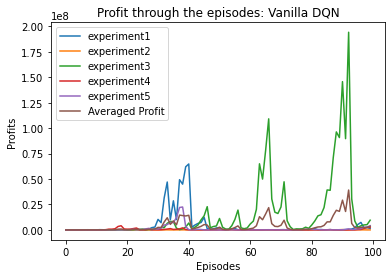

In [ ]:
plt.plot(result1[0], label = "experiment1")
plt.plot(result2[0],  label = "experiment2")
plt.plot(result3[0],  label = "experiment3")
plt.plot(result4[0],  label = "experiment4")
plt.plot(result5[0],  label = "experiment5")
plt.plot(avr1[0],  label = "Averaged Profit")
plt.xlabel("Episodes")
plt.ylabel("Profits")
plt.title("Profit through the episodes: Vanilla DQN")
plt.legend()
plt.show()

In [ ]:
avr2=(result6+result7+result8+result9+result10)/5

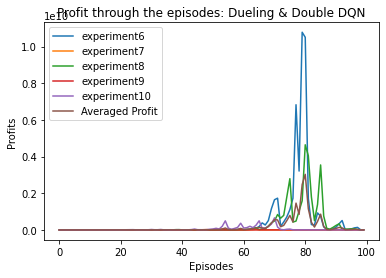

In [ ]:
plt.plot(result6[0], label = "experiment6")
plt.plot(result7[0],  label = "experiment7")
plt.plot(result8[0],  label = "experiment8")
plt.plot(result9[0],  label = "experiment9")
plt.plot(result10[0],  label = "experiment10")
plt.plot(avr2[0],  label = "Averaged Profit")
plt.xlabel("Episodes")
plt.ylabel("Profits")
plt.title("Profit through the episodes: Dueling & Double DQN")
plt.legend()
plt.show()

In [ ]:
avr3=(result11+result12+result13+result14+result15)/5

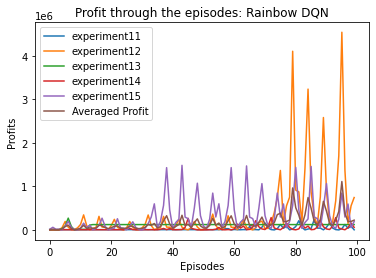

In [ ]:
plt.plot(result11[0], label = "experiment11")
plt.plot(result12[0],  label = "experiment12")
plt.plot(result13[0],  label = "experiment13")
plt.plot(result14[0],  label = "experiment14")
plt.plot(result15[0],  label = "experiment15")
plt.plot(avr3[0],  label = "Averaged Profit")
plt.xlabel("Episodes")
plt.ylabel("Profits")
plt.title("Profit through the episodes: Rainbow DQN")
plt.legend()
plt.show()

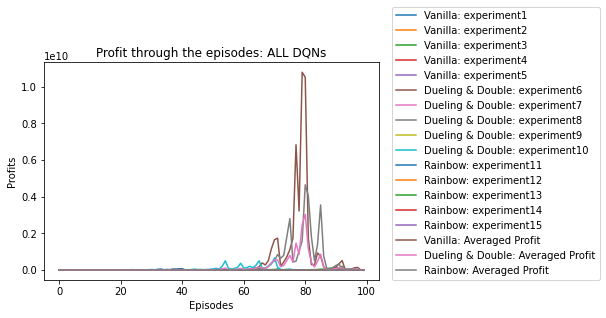

In [ ]:
plt.plot(result1[0], label = "Vanilla: experiment1")
plt.plot(result2[0],  label = "Vanilla: experiment2")
plt.plot(result3[0],  label = "Vanilla: experiment3")
plt.plot(result4[0],  label = "Vanilla: experiment4")
plt.plot(result5[0],  label = "Vanilla: experiment5")
plt.plot(result6[0], label = "Dueling & Double: experiment6")
plt.plot(result7[0],  label = "Dueling & Double: experiment7")
plt.plot(result8[0],  label = "Dueling & Double: experiment8")
plt.plot(result9[0],  label = "Dueling & Double: experiment9")
plt.plot(result10[0],  label = "Dueling & Double: experiment10")
plt.plot(result11[0], label = "Rainbow: experiment11")
plt.plot(result12[0],  label = "Rainbow: experiment12")
plt.plot(result13[0],  label = "Rainbow: experiment13")
plt.plot(result14[0],  label = "Rainbow: experiment14")
plt.plot(result15[0],  label = "Rainbow: experiment15")
plt.plot(avr1[0],  label = "Vanilla: Averaged Profit")
plt.plot(avr2[0],  label = "Dueling & Double: Averaged Profit")
plt.plot(avr3[0],  label = "Rainbow: Averaged Profit")
plt.xlabel("Episodes")
plt.ylabel("Profits")
plt.title("Profit through the episodes: ALL DQNs")
plt.legend(loc=(1.04,0))
plt.show()

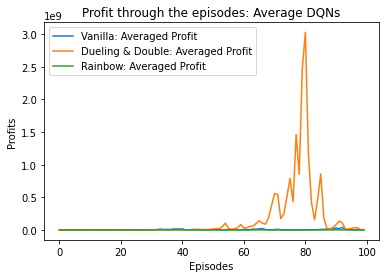

In [ ]:
plt.plot(avr1[0],  label = "Vanilla: Averaged Profit")
plt.plot(avr2[0],  label = "Dueling & Double: Averaged Profit")
plt.plot(avr3[0],  label = "Rainbow: Averaged Profit")
plt.xlabel("Episodes")
plt.ylabel("Profits")
plt.title("Profit through the episodes: Average DQNs")
plt.legend()
plt.show()